#### Ejemplo de regresión lineal 

Modelo que relaciona el dinero con la felicidad. Se tienen en cuenta, las variables: 
OECD's life satisfaction (emitida por la Organización para la Cooperación y el Desarrollo Económico)
y IMF's GDP per capita data (emitido por el Fondo Monetario Internacional (FMI)).

**(Variable objetivo) OECD's life satisfaction**:

El Índice para una Vida Mejor (en inglés, Better Life Index, o BLI) es un índice económico-social creado por la OCDE en 2011. El Índice para una Vida Mejor permite a las personas comparar los países según sus propias preferencias a través de 11 criterios considerados como esenciales para el bienestar de la población:

    Vivienda: condiciones de la vivienda, número de habitaciones por persona y gasto relativo en vivienda.
    Ingresos: ingresos de la unidad familiar (después de impuestos) y riqueza financiera
    Empleo: salarios, seguridad laboral y desempleo
    Comunidad: calidad de la red de apoyo social de las personas
    Educación: años de educación, logros educativos y competencias de los estudiantes
    Medio ambiente: calidad del mediomabiente, contaminación, calidad del agua
    Compromiso cívico: confianza en las instituciones públicas, transparencia democrática, participación electoral
    Salud: esperanza de vida, nivel de salud percibida
    Satisfacción: nivel de satisfacción con la vida
    Seguridad: sentimiento de seguridad al caminar a solas por la noche, tasa de homicidios
    Equilibrio vida-trabajo: exceso de horas de trabajo, tiempo dedicado al ocio y el cuidado personal

**(Variable independiente) IMF's GDP per capita data**:

El valor total de todos los bienes y servicios producidos por un país en un año en particular, dividido por el número de personas que viven allí.





In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
country_stats = pd.read_excel('naciones.xlsx')
country_stats[:3]

country_stats.tail()

,Country,GDP per capita,Life satisfaction
24,Iceland,50854.583,7.5
25,Australia,50961.865,7.3
26,Ireland,51350.744,7.0
27,Denmark,52114.165,7.5
28,United States,55805.204,7.2


In [31]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]
print(X.shape, y.shape)

(29, 1) (29, 1)


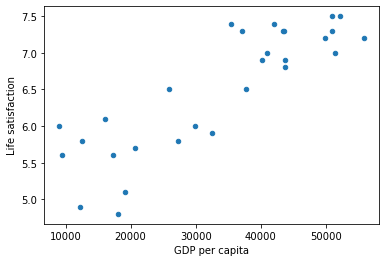

In [32]:
# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

Al ver el gráfico, se nota una cierta tendencia. Aunque hay cierto ruido en los datos, se percibe más o menos una dependencia lineal entre nivel de satisfacción en la vida con ingresos per capita.

Es allí donde se propone un modelo lineal simple tal como:

$$\text{Life satisfaction} = m \cdot \text{GDP per capita} + b$$

Los parámetros de dicho modelo son $m$ y $b$. Dados los valores de $m$ y $b$, se obtiene un modelo que podría o no, ajustar bien los datos. Para precisar las ideas, se tiene que construir una función me mide el desempeño de un modelo, por ejemplo, midiendo el desajuste en términos de la suma de diferencias cuadráticas entre valores reales y valores que predice el modelo.

Al proceso de construcción de los parámetros $m$ y $b$ que minimicen el desajuste (es decir, que optimizan el desempeño) se le conoce como etapa de **entrenamiento** del modelo. Dicha etapa en términos técnicos, se lleva a cabo al usar el método `.fit` sobre una instancia de la clase de modelos que se consideren.

In [33]:
# Select a model
model = LinearRegression()

# Train the model
model.fit(X, y)
b, m = model.intercept_[0], model.coef_[0][0]
print(f'intercepto: {b}')
print(f'pendiente: {m}')
# Make a prediction
X_new = [[22587]]
print('predicción: ', model.predict(X_new))

intercepto: 4.853052800266436
pendiente: 4.911544589158484e-05
predicción:  [[5.96242338]]


En el código anterior se ha utilizado otro método (de uso frecuente) y es `.predict`, que se usa para estimar el valor de la variable dependiente (en este caso Life satisfaction) sobre un datos o datos nuevos que no participaron de la etapa de entrenamiento.

Si en lugar de predecir sobre un valor, se hace sobre un intervalo de valores, entonces se puede ver en forma más intuitiva el modelo, a partir de un gráfico.

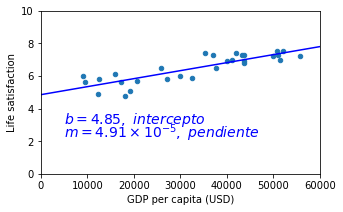

In [34]:


country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
x_s=np.linspace(0, 60000, 1000)
plt.plot(x_s, m*x_s + b, "b")

plt.text(5000, 3.1, r"$b = 4.85, \ intercepto$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$m = 4.91 \times 10^{-5}, \ pendiente$", fontsize=14, color="b")
plt.show()


Hay algunos desafíos que se presentan al entrenar un modelo. Entre ellos está, que los datos usados para el entrenamiento no sean representativos. Por ejemplo, suponga que hay otras naciones que no fueron consideradas en el entrenamiento del modelo. Se tomarán Brazil, Mexico, Chile y Czech Republic (con bajo GDP per capita) y por otro lado Norway, Switzerland y Luxembourg (con alto GDP per capita). Es posible que el modelo que se entrenó sin esos nuevos datos, no prediga bien sobre los mismos.

In [35]:
some_countries_out_data = pd.DataFrame({"Country": ["Brazil", "Mexico", "Chile", "Czech Republic", "Norway", "Switzerland", "Luxembourg"],
                                        "GDP per capita": [8669.998,9009.280,13340.905,17256.918,74822.106,80675.308,101994.093],
                                        "Life satisfaction": [7.0,6.7, 6.7, 6.5, 7.4, 7.5, 6.9]})
some_countries_out_data

,Country,GDP per capita,Life satisfaction
0,Brazil,8669.998,7.0
1,Mexico,9009.280,6.7
2,Chile,13340.905,6.7
3,Czech Republic,17256.918,6.5
4,Norway,74822.106,7.4
5,Switzerland,80675.308,7.5
6,Luxembourg,101994.093,6.9


In [36]:
all_countries = country_stats.merge(some_countries_out_data, how='outer')

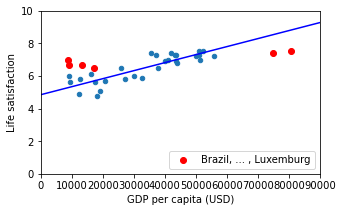

In [38]:
all_countries.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 90000, 0, 10])
plt.scatter(all_countries[29:]['GDP per capita'], all_countries[29:]['Life satisfaction'], color='red', label='Brazil, ... , Luxemburg')
x_s=np.linspace(0, 90000, 1000)
plt.plot(x_s, m*x_s + b, "b")
plt.legend(loc='lower right')
plt.show()

intercepto: 5.763029861307918
pendiente: 2.3177337047396064e-05


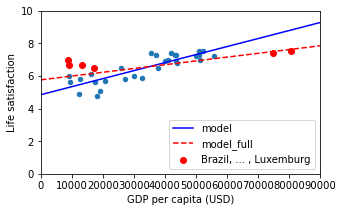

In [41]:
# model on all the data
model_full = LinearRegression()

# Train the model
X_full = np.c_[all_countries['GDP per capita']]
y_full = np.c_[all_countries['Life satisfaction']]

model_full.fit(X_full, y_full)
b_full, m_full = model_full.intercept_[0], model_full.coef_[0][0]
print(f'intercepto: {b_full}')
print(f'pendiente: {m_full}')

all_countries.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 90000, 0, 10])
plt.scatter(all_countries[29:]['GDP per capita'], all_countries[29:]['Life satisfaction'], color='red', label='Brazil, ... , Luxemburg')
x_s=np.linspace(0, 90000, 1000)
plt.plot(x_s, m*x_s + b, "b", label='model')
plt.plot(x_s, m_full*x_s + b_full, "r--", label='model_full')
plt.legend(loc='lower right')
plt.show()


/usr/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


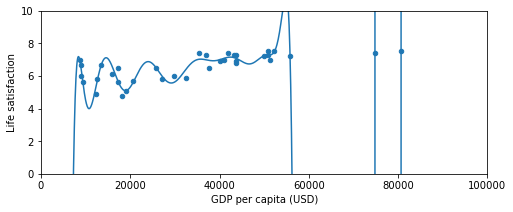

In [46]:
all_countries.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 100000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(X_full, y_full)
x_s=np.linspace(0, 90000, 1000)
curve = pipeline_reg.predict(x_s.reshape(-1,1))
plt.plot(x_s, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()

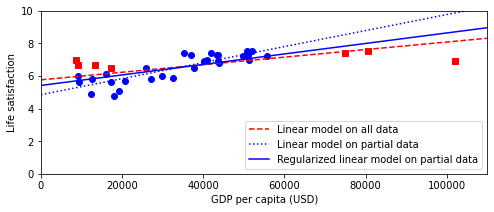

In [49]:
from sklearn.linear_model import Ridge

plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(country_stats["GDP per capita"]), list(country_stats["Life satisfaction"]), "bo")
plt.plot(list(all_countries[29:]["GDP per capita"]), list(all_countries[29:]["Life satisfaction"]), "rs")

x_s = np.linspace(0, 110000, 1000)
plt.plot(x_s, b_full + m_full * x_s, "r--", label="Linear model on all data")
plt.plot(x_s, b + m*x_s, "b:", label="Linear model on partial data")

ridge = Ridge(alpha=10**9.5)
Xsample = np.c_[country_stats["GDP per capita"]]
ysample = np.c_[country_stats["Life satisfaction"]]
ridge.fit(Xsample, ysample)
b_ridge, m_ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(x_s, b_ridge + m_ridge * x_s, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
plt.show()

Existen unos desafíos en el proceso de creación de modelos a partir de los datos. Simplificando, se enfrenta el problema de tener **datos en poca cantidad o de poca calidad** o **algoritmo inadecuado para constuir el modelo**. Existe la posiblidad de que el modelo construido ajuste muy bien los datos que se usan en su construcción, pero que tenga un bajo desempeño con datos no involucrados en la construcción misma del modelo. Buenos resultados en ajuste pero malos resultados en predicción sobre datos nuevos, se conoce como el problema del sobreajuste y la forma de resolverlo es con la técnica de la regularización, que en cierto modo reduce la clase de modelos candidatos a constuir. 

En el caso en el que no se logre construir un modelo que logre capturar la estructura subyacente en los datos, se procura incluir más parámetros al modelo (crear un modelo un poco más complejo) o crear nuevos atributos (ingeniería de atributos).

